In [3]:
%pylab inline
import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


#adding datta to the file for analysis

In [6]:
data = pd.read_csv("uber-raw-data-apr14.txt")

In [10]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


 #converting datetime and add some useful columns

In [13]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [17]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [45]:
def get_dom(self):
    return self.day
data['DoM'] = data['Date/Time'].map(get_dom)

In [46]:
data.tail()

,Date/Time,Lat,Lon,Base,DoM,WeekDay,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [44]:
def get_weekday(self):
    return self.weekday()
data['WeekDay'] = data['Date/Time'].map(get_weekday)

def get_hour(self):
    return self.hour
data['Hour'] = data['Date/Time'].map(get_hour)

Analysis

Analyse the DoM(Date of Month)

Text(0.5, 1.0, 'Frequency by month - uber - April 2014')

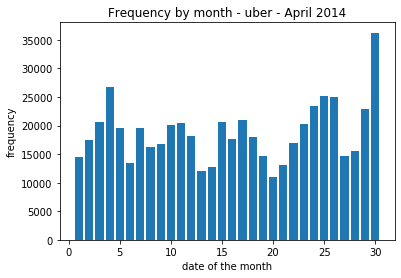

In [134]:
hist(data.DoM, bins = 30, rwidth = .8, range = (0.5, 30.5))
xlabel("date of the month")
ylabel("frequency")
title("Frequency by month - uber - April 2014")

In [65]:
def count_rows(self):
    return len(self)

by_date = data.groupby('DoM').apply(count_rows)


In [75]:
by_date_sorted = by_date.sort_values()



Text(0.5, 1.0, 'Frequency by month - uber - April 2014')

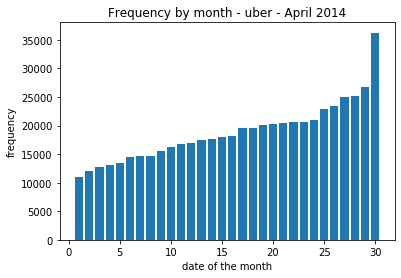

In [136]:
bar(range (1 , 31) , by_date_sorted)
#xticks(range(1, 31), by_date_sorted)
xlabel("date of the month")
ylabel("frequency")
title("Frequency by month - uber - April 2014")

Analyze the hour

In [137]:
#hist(data.Hour, bins = 24, range =  (.5, 24), rwidth = .8);
#xlabel('Hour per month')
#ylabel('Frquency')
#title("Frequency by hour - uber - April 2014")

In [140]:
by_hour =  data.groupby('Hour').apply(count_rows)
by_hour_sorted = by_hour.sort_values()

Text(0.5, 1.0, 'Frequency by hour - uber - April 2014')

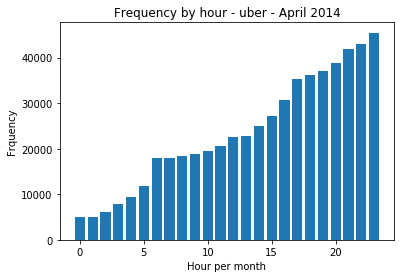

In [139]:
bar(range(0, 24), by_hour_sorted)
xlabel('Hour per month')
ylabel('Frquency')
title("Frequency by hour - uber - April 2014")

analyze the weekday

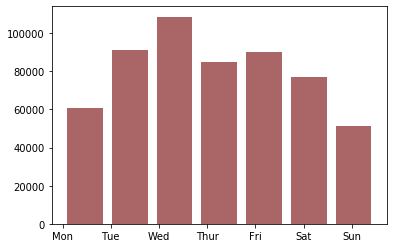

In [169]:
hist(data.WeekDay, range = (0, 6.5), bins = 7, rwidth = .8, color = "#AA6666");
xticks(range(7),'Mon Tue Wed Thur Fri Sat Sun'.split());

cross analysis using seaborn

In [175]:
by_hr_day = data.groupby('WeekDay Hour'.split()).apply(count_rows).unstack()

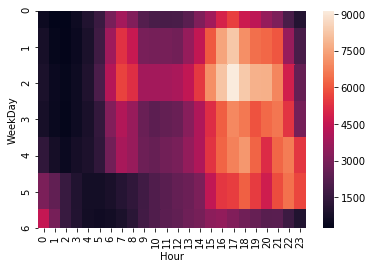

In [177]:
sns.heatmap(by_hr_day)

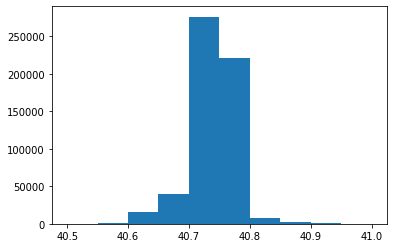

In [192]:
hist(data['Lat'], range = (40.5, 41.0));

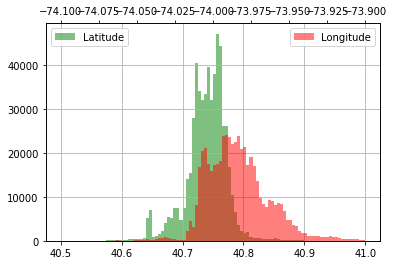

In [211]:
hist(data['Lat'], range = (40.5, 41.0), bins = 100, color = 'green', alpha = 0.5, label = "Latitude");
grid()
legend(loc = "upper left")
twiny()
hist(data['Lon'], range = (-74.1, -73.9), bins= 100, color = 'red', alpha = 0.5, label = "Longitude");
legend(loc = "best")



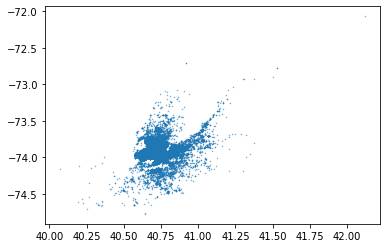

In [209]:
plot(data['Lat'], data['Lon'], '*', ms = 1, alpha = .5)